# LDA Clustering

## Importing of Libraries
Run this as a seperate cell in order to reduce latency

In [1]:
from gensim.models import CoherenceModel

import matplotlib.pyplot as plt
import datetime
import gensim
import nltk
import re
import os

## Pre-Processing
Loading of training data, removing of stop words from dataset and stemming as well. Additionally, will be converting those words into vector to fit it into the model

In [2]:
# Gets list of stop words and stemmer object
stop_list = nltk.corpus.stopwords.words("english")
stemmer = nltk.stem.porter.PorterStemmer()

In [3]:
# Converts text files into a corpus
train_corpus = nltk.corpus.PlaintextCorpusReader("./TrainTest_Transcripts/Train/", ".+\.txt")

In [4]:
# Converts corpus into a list of documents
fids = train_corpus.fileids()
docs1 = []
for fid in fids:
    doc_raw = train_corpus.raw(fid)
    doc = nltk.word_tokenize(doc_raw)
    docs1.append(doc)
docs2 = [[w.lower() for w in doc] for doc in docs1]
docs3 = [[w for w in doc if re.search('^[a-z]+$', w)] for doc in docs2]
docs4 = [[w for w in doc if w not in stop_list] for doc in docs3]
train_docs = [[stemmer.stem(w) for w in doc] for doc in docs4]

In [5]:
# Creates a dictionary for bag-of-words purposes
train_dictionary = gensim.corpora.Dictionary(train_docs)

# Convert the list of documents into vectors
train_vecs = [train_dictionary.doc2bow(doc) for doc in train_docs]

## Determining optimal K 
Will be using the coherence score (avereage distance between words) to determine the optimal K for the LDA mallet model.

Choosing a ‘k’ that marks the end of a rapid growth of topic coherence usually offers meaningful and interpretable topics. Picking an even higher value can sometimes provide more granular sub-topics.

If you see the same keywords being repeated in multiple topics, it’s probably a sign that the ‘k’ is too large.

In [6]:
# Importing of external library; mallet
os.environ.update({'MALLET_HOME':r'./libs/mallet-2.0.8/'})
mallet_path = r'./libs/mallet-2.0.8/bin/mallet'

In [7]:
start_time = datetime.datetime.now()

In [8]:
# RUN 1
model_list_1 = []
coherence_values_1 = []
model_topics_1 = []

for num_topics in range(2, 30, 2):
    train_ldaMallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=train_vecs, num_topics=num_topics, id2word=train_dictionary)
    coherencemodel = CoherenceModel(model=train_ldaMallet, texts=train_docs, dictionary=train_dictionary, coherence='c_v')
    model_topics_1.append(num_topics)
    model_list_1.append(train_ldaMallet)
    coherence_values_1.append(coherencemodel.get_coherence())
    print("#Topics: " + str(num_topics) + ", Score: " + str(coherencemodel.get_coherence()))

#Topics: 2, Score: 0.2581912664404484
#Topics: 4, Score: 0.29497919069894873
#Topics: 6, Score: 0.351724017969341
#Topics: 8, Score: 0.3567327904385763
#Topics: 10, Score: 0.37204398698380675
#Topics: 12, Score: 0.3808281901153752
#Topics: 14, Score: 0.400475071727635
#Topics: 16, Score: 0.4059106993400384
#Topics: 18, Score: 0.4046843835584626
#Topics: 20, Score: 0.40893539950009467
#Topics: 22, Score: 0.4292232548865163
#Topics: 24, Score: 0.4317817803313601
#Topics: 26, Score: 0.4311943428675956
#Topics: 28, Score: 0.4225681866119285


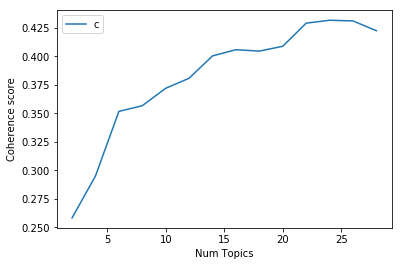

In [9]:
# Plotting of graph for RUN 1
limit=30; start=2; step=2;

x = range(start, limit, step)

plt.plot(x, coherence_values_1)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [10]:
# RUN 2
model_list_2 = []
coherence_values_2 = []
model_topics_2 = []

for num_topics in range(30, 60, 2):
    train_ldaMallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=train_vecs, num_topics=num_topics, id2word=train_dictionary)
    coherencemodel = CoherenceModel(model=train_ldaMallet, texts=train_docs, dictionary=train_dictionary, coherence='c_v')
    model_topics_2.append(num_topics)
    model_list_2.append(train_ldaMallet)
    coherence_values_2.append(coherencemodel.get_coherence())
    print("#Topics: " + str(num_topics) + ", Score: " + str(coherencemodel.get_coherence()))

#Topics: 30, Score: 0.43620580182131957
#Topics: 32, Score: 0.42798788238186897
#Topics: 34, Score: 0.43600280789436824
#Topics: 36, Score: 0.4364645614771019
#Topics: 38, Score: 0.4355284488174965
#Topics: 40, Score: 0.435707561732252
#Topics: 42, Score: 0.4417337921222379
#Topics: 44, Score: 0.4290503150197432
#Topics: 46, Score: 0.4444787179528973
#Topics: 48, Score: 0.4474373007820181
#Topics: 50, Score: 0.4430554840932544
#Topics: 52, Score: 0.441044517234399
#Topics: 54, Score: 0.4320460927371197
#Topics: 56, Score: 0.4303023363619961
#Topics: 58, Score: 0.43863872449571556


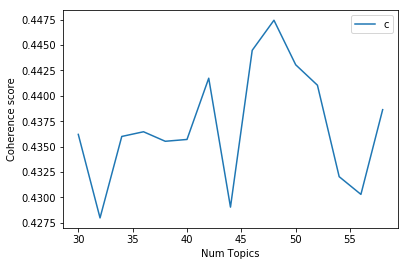

In [11]:
# Plotting of graph for RUN 2
limit=60; start=30; step=2;

x = range(start, limit, step)

plt.plot(x, coherence_values_2)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [12]:
# RUN 3
model_list_3 = []
coherence_values_3 = []
model_topics_3 = []

for num_topics in range(60, 90, 2):
    train_ldaMallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=train_vecs, num_topics=num_topics, id2word=train_dictionary)
    coherencemodel = CoherenceModel(model=train_ldaMallet, texts=train_docs, dictionary=train_dictionary, coherence='c_v')
    model_topics_3.append(num_topics)
    model_list_3.append(train_ldaMallet)
    coherence_values_3.append(coherencemodel.get_coherence())
    print("#Topics: " + str(num_topics) + ", Score: " + str(coherencemodel.get_coherence()))

#Topics: 60, Score: 0.4391745181023914
#Topics: 62, Score: 0.43457606288378703
#Topics: 64, Score: 0.441299461748609
#Topics: 66, Score: 0.43879564601041976
#Topics: 68, Score: 0.43613562340753614
#Topics: 70, Score: 0.43194062442287845
#Topics: 72, Score: 0.4444285123449199
#Topics: 74, Score: 0.43109023102632005
#Topics: 76, Score: 0.4397302598698165
#Topics: 78, Score: 0.4372850003029967
#Topics: 80, Score: 0.42764518906259247
#Topics: 82, Score: 0.43500080003123537
#Topics: 84, Score: 0.4311877027724106
#Topics: 86, Score: 0.43058145261479963
#Topics: 88, Score: 0.4211810005624079


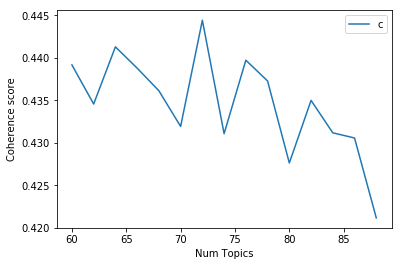

In [13]:
# Plotting of graph for RUN 3
limit=90; start=60; step=2;

x = range(start, limit, step)

plt.plot(x, coherence_values_3)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [14]:
# RUN 4
model_list_4 = []
coherence_values_4 = []
model_topics_4 = []

for num_topics in range(90, 120, 2):
    train_ldaMallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=train_vecs, num_topics=num_topics, id2word=train_dictionary)
    coherencemodel = CoherenceModel(model=train_ldaMallet, texts=train_docs, dictionary=train_dictionary, coherence='c_v')
    model_topics_4.append(num_topics)
    model_list_4.append(train_ldaMallet)
    coherence_values_4.append(coherencemodel.get_coherence())
    print("#Topics: " + str(num_topics) + ", Score: " + str(coherencemodel.get_coherence()))

#Topics: 90, Score: 0.4335538213880004
#Topics: 92, Score: 0.42913772216454343
#Topics: 94, Score: 0.4258351866777491
#Topics: 96, Score: 0.43232648869722
#Topics: 98, Score: 0.4256332169595269
#Topics: 100, Score: 0.4271227180857116
#Topics: 102, Score: 0.42752600614407527
#Topics: 104, Score: 0.4256840923724497
#Topics: 106, Score: 0.4221675563238882
#Topics: 108, Score: 0.42179835886806205
#Topics: 110, Score: 0.4226220217387769
#Topics: 112, Score: 0.4216938409484085
#Topics: 114, Score: 0.4235916327505747
#Topics: 116, Score: 0.41412608503403076
#Topics: 118, Score: 0.425592937050291


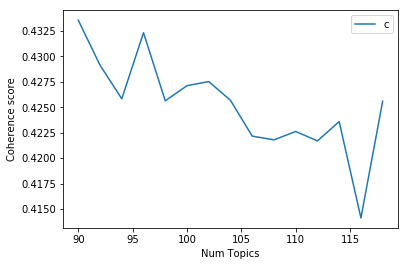

In [15]:
# Plotting of graph for RUN 4
limit=120; start=90; step=2;

x = range(start, limit, step)

plt.plot(x, coherence_values_4)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [16]:
end_time = datetime.datetime.now()

In [17]:
print("Start time: ", start_time)
print("End time: ", end_time)

Start time:  2020-04-01 00:18:23.857937
End time:  2020-04-01 05:15:31.729106


### Collating model and coherence score
Collating to plot out the entire series from K 2 to 120 to determine optimal K

In [18]:
collated_model_list = model_list_1 + model_list_2 + model_list_3 + model_list_4
collated_coherence_values = coherence_values_1 + coherence_values_2 + coherence_values_3 + coherence_values_4
colated_model_topics = model_topics_1 + model_topics_2 + model_topics_3 + model_topics_4

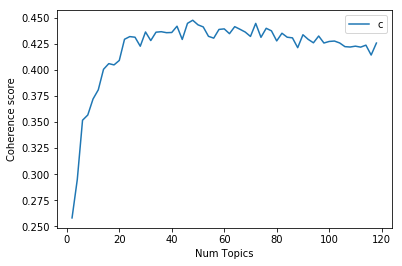

In [19]:
# Plotting of entire series
limit=120; start=2; step=2;

x = range(start, limit, step)

plt.plot(x, collated_coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [20]:
# Retrieve based on highest coherence value
highest_coherence_value = max(collated_coherence_values)
index = collated_coherence_values.index(highest_coherence_value)

# Retrieve the model and the no. of topics with the highest coherence value
highest_lda_model = collated_model_list[index]
highest_lda_topics = colated_model_topics[index]

In [25]:
print("Highest coherence score:", highest_coherence_value)
print("Number of topics with highest coherence score:", highest_lda_topics)

Highest coherence score: 0.4474373007820181
Number of topics with highest coherence score: 48


### Save the LDA models
Saving models from 2 to 120

In [28]:
models_folder = "./LDA_Models/"

for model_num in range(0, len(collated_model_list)):
    model_name = "train_LDA_" + str(colated_model_topics[model_num])
    collated_model_list[model_num].save(models_folder + model_name)
    print("Saving model: ")

./LDA_Models/train_LDA_2
./LDA_Models/train_LDA_4
./LDA_Models/train_LDA_6
./LDA_Models/train_LDA_8
./LDA_Models/train_LDA_10
./LDA_Models/train_LDA_12
./LDA_Models/train_LDA_14
./LDA_Models/train_LDA_16
./LDA_Models/train_LDA_18
./LDA_Models/train_LDA_20
./LDA_Models/train_LDA_22
./LDA_Models/train_LDA_24
./LDA_Models/train_LDA_26
./LDA_Models/train_LDA_28
./LDA_Models/train_LDA_30
./LDA_Models/train_LDA_32
./LDA_Models/train_LDA_34
./LDA_Models/train_LDA_36
./LDA_Models/train_LDA_38
./LDA_Models/train_LDA_40
./LDA_Models/train_LDA_42
./LDA_Models/train_LDA_44
./LDA_Models/train_LDA_46
./LDA_Models/train_LDA_48
./LDA_Models/train_LDA_50
./LDA_Models/train_LDA_52
./LDA_Models/train_LDA_54
./LDA_Models/train_LDA_56
./LDA_Models/train_LDA_58
./LDA_Models/train_LDA_60
./LDA_Models/train_LDA_62
./LDA_Models/train_LDA_64
./LDA_Models/train_LDA_66
./LDA_Models/train_LDA_68
./LDA_Models/train_LDA_70
./LDA_Models/train_LDA_72
./LDA_Models/train_LDA_74
./LDA_Models/train_LDA_76
./LDA_Models/tra